In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 

import seaborn as sns

import numpy as np
import pandas as pd

from src import config, sampling_utils, data
from utils import *

In [2]:
default_cfg = config.SpriteWorldConfig()
default_cfg

SpriteWorldConfig(x=Range(min=0.3, max=0.7), y=Range(min=0.2, max=0.8), shape=['triangle', 'square', 'circle'], scale=Range(min=0.1, max=0.5), angle=Range(min=0, max=360), c0=Range(min=0.1, max=0.9), c1=Range(min=0.1, max=0.9), c2=Range(min=0.1, max=0.9))

## Random Sampling

In [15]:
n_samples = 500
n_slots = 3
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="random")

Generating images (sampling: random): 100%|█████████████████████████████████████████| 500/500 [00:04<00:00, 108.69it/s]


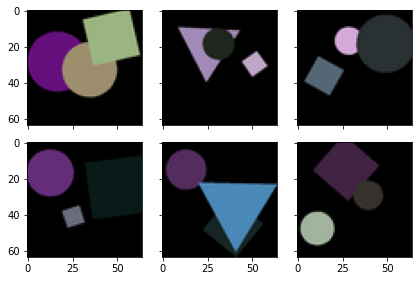

In [19]:
plot_random_dataset_images(random_dataset)

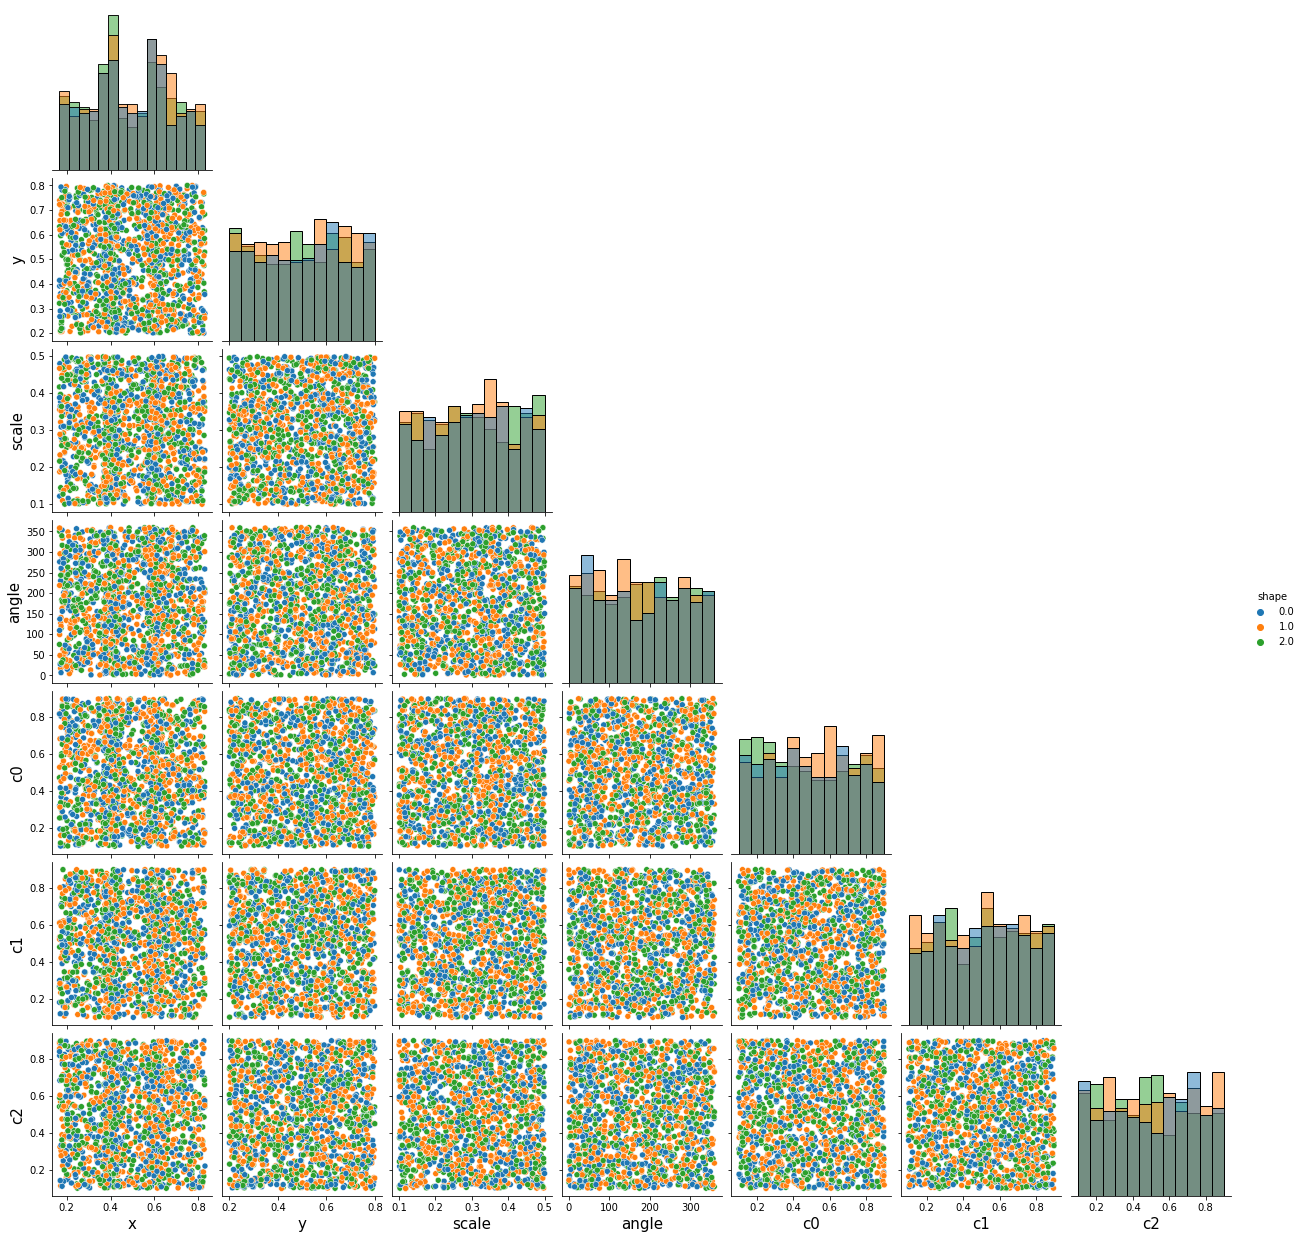

In [20]:
plot_latents_scatter(random_dataset)

For latent 'shape' 157 pairs out of 500 are the same.


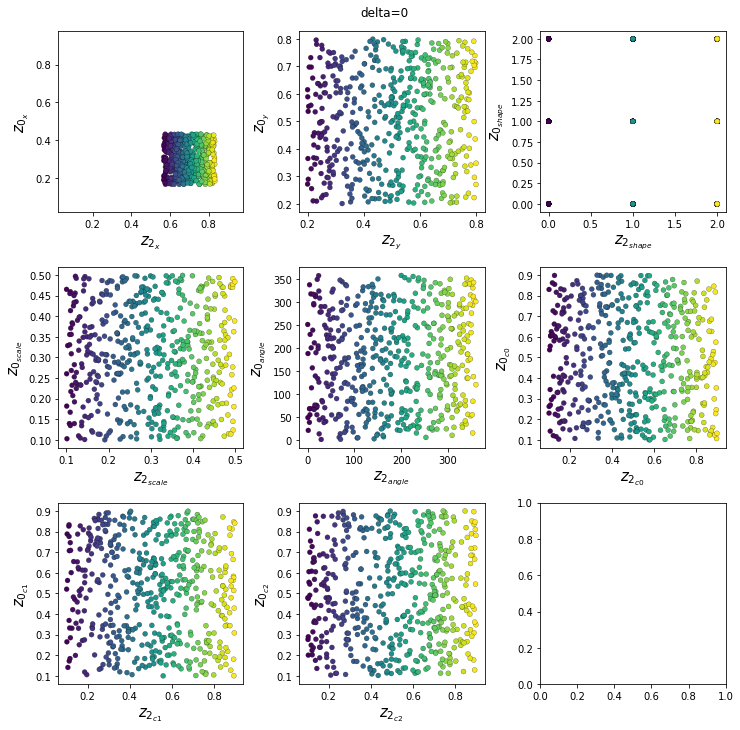

In [21]:
plot_slots_scatter(random_dataset, n_slots)

## Diagonal sampling

In [6]:
n_slots = 2
n_samples = 500
delta = 0.1
diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="diagonal", delta=delta)

Generating images (sampling: diagonal): 100%|███████████████████████████████████████| 500/500 [00:03<00:00, 160.19it/s]


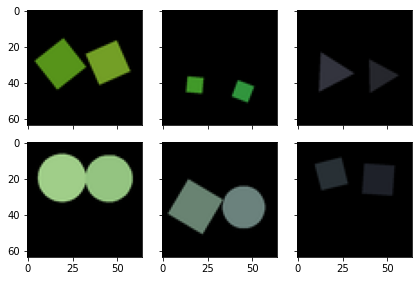

In [7]:
plot_random_dataset_images(diagonal_dataset)

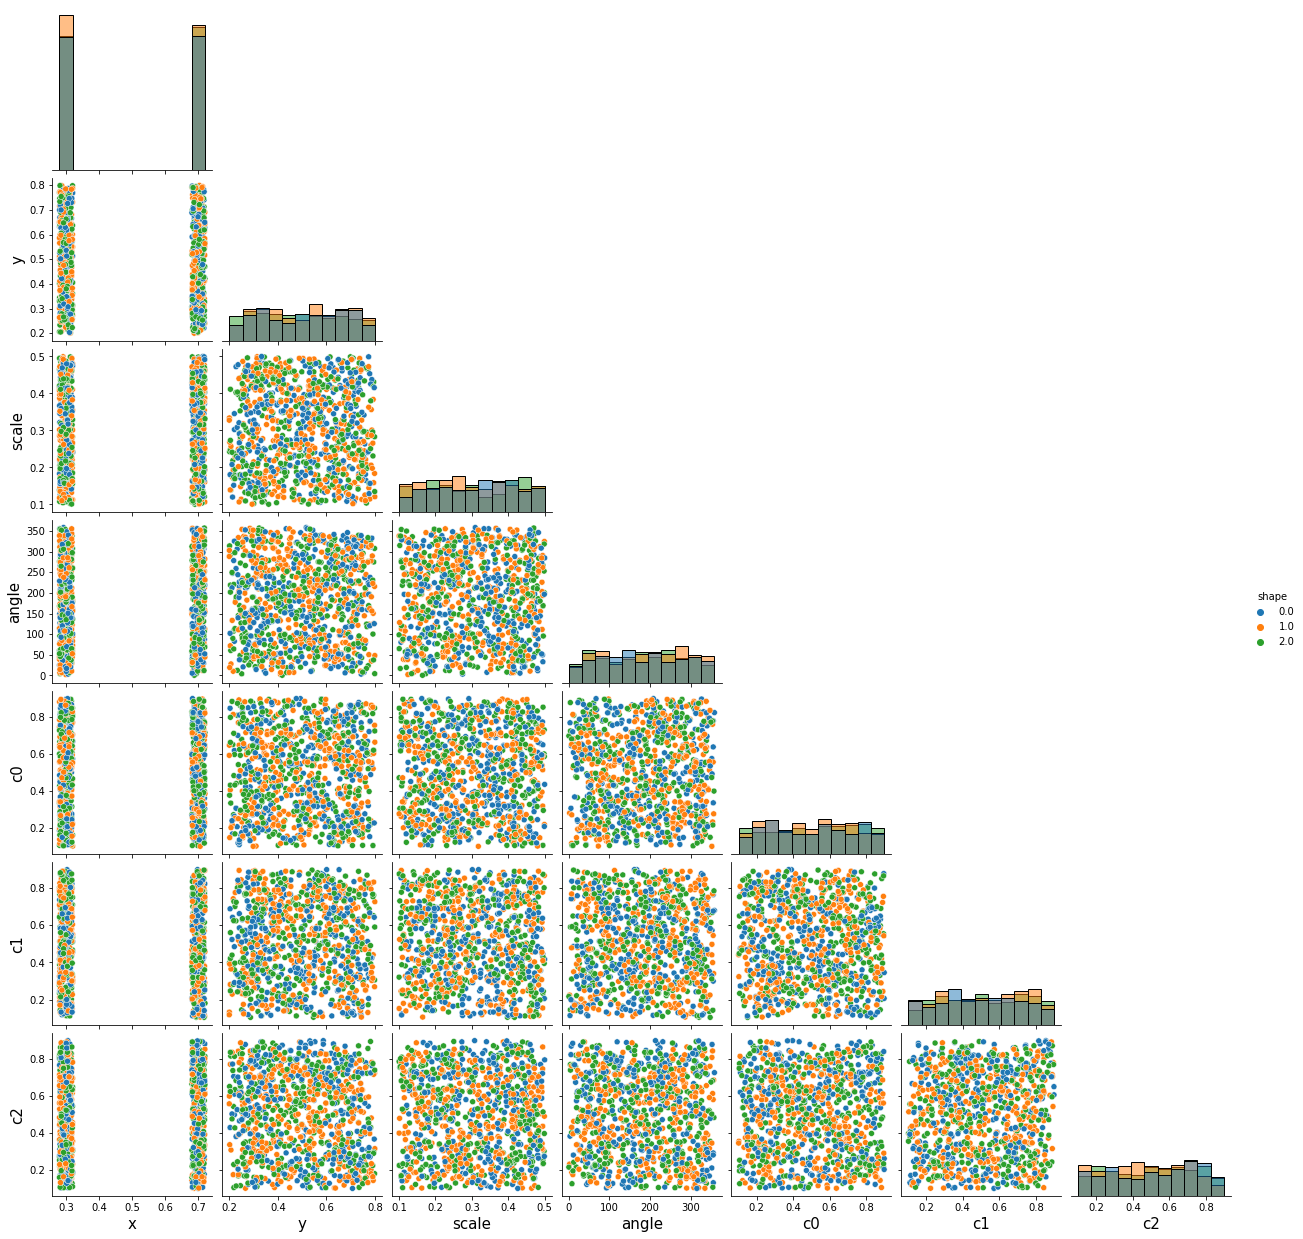

In [8]:
plot_latents_scatter(diagonal_dataset)

For latent 'shape' 444 pairs out of 500 are the same.


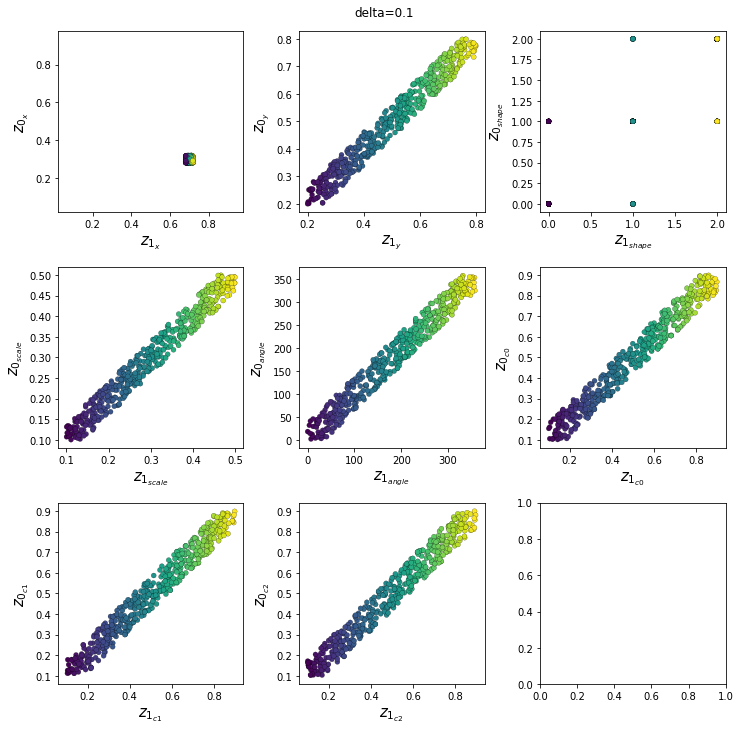

In [9]:
plot_slots_scatter(diagonal_dataset, n_slots, delta)

In [35]:
delta = 0.1
n_slots = 3
n_samples = 1500
diagonal_dataset_01 = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="diagonal", delta=delta)

Generating images (sampling: diagonal): 100%|█████████████████████████████████████| 1500/1500 [00:12<00:00, 116.64it/s]


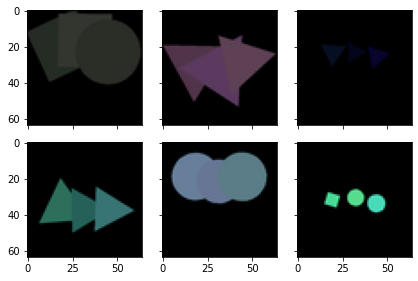

For latent 'shape' 1326 pairs out of 1500 are the same.


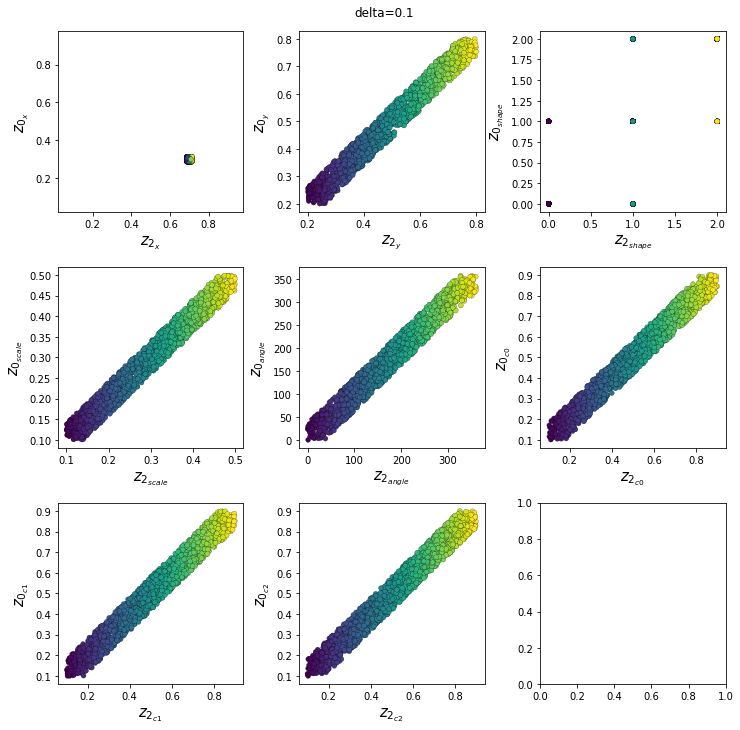

In [36]:
plot_random_dataset_images(diagonal_dataset_01)
plot_slots_scatter(diagonal_dataset_01, 
                   n_slots, 
                   delta)

Generating images (sampling: diagonal): 100%|███████████████████████████████████████| 500/500 [00:03<00:00, 162.27it/s]


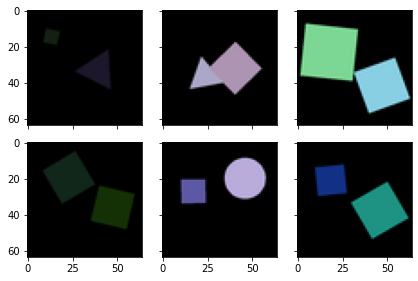

For latent 'shape' 208 pairs out of 500 are the same.


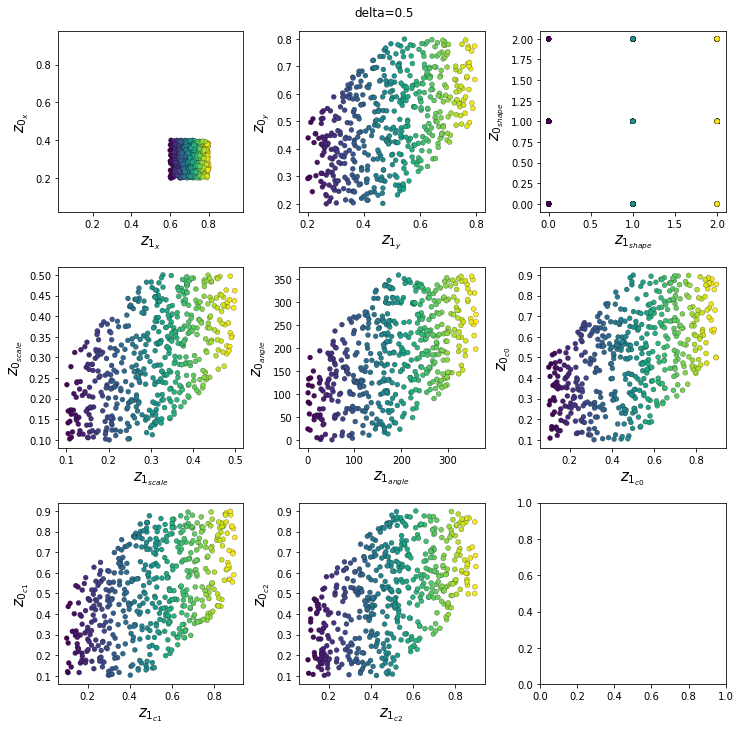

In [11]:
delta = 0.5
delta = 0.1
n_slots = 3
n_samples = 1500
diagonal_dataset_05 = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="diagonal", delta=delta)
plot_random_dataset_images(diagonal_dataset_05)
plot_slots_scatter(diagonal_dataset_05, 
                   n_slots, 
                   delta)

Generating images (sampling: diagonal): 100%|███████████████████████████████████████| 500/500 [00:03<00:00, 157.53it/s]


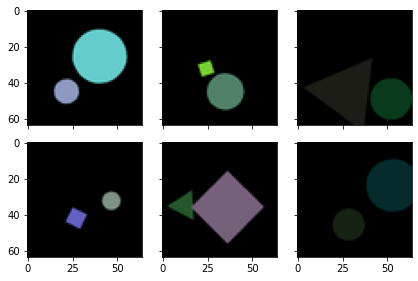

For latent 'shape' 161 pairs out of 500 are the same.


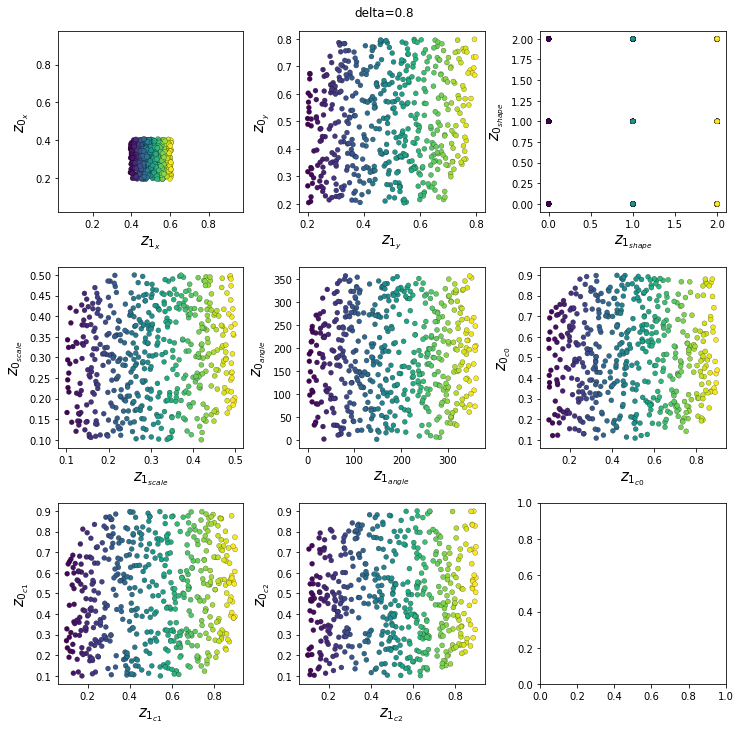

In [27]:
delta = 0.8
n_slots = 2
diagonal_dataset_08 = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="diagonal", delta=delta)
plot_random_dataset_images(diagonal_dataset_08)
plot_slots_scatter(diagonal_dataset_1, 
                   n_slots, 
                   delta)

In [13]:
n_slots = 2
n_samples = 20000
delta = 0.5
diagonal_dataset_heatmap = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="diagonal", delta=delta)

Generating images (sampling: diagonal): 100%|███████████████████████████████████| 20000/20000 [02:05<00:00, 159.44it/s]


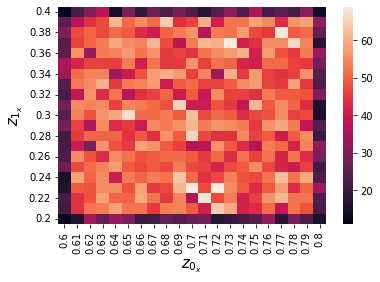

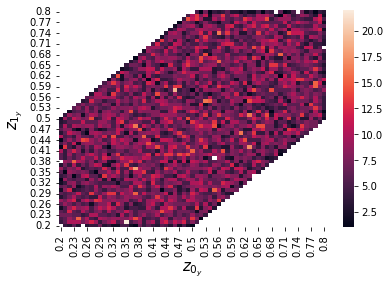

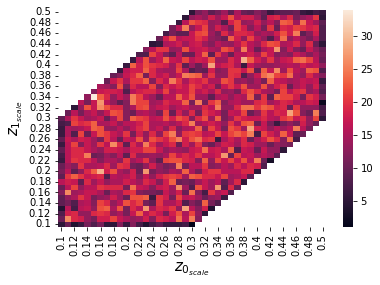

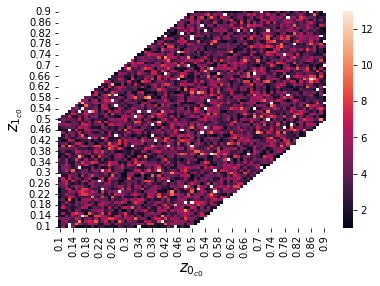

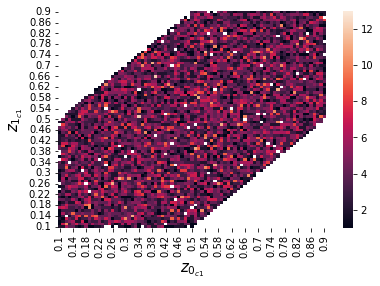

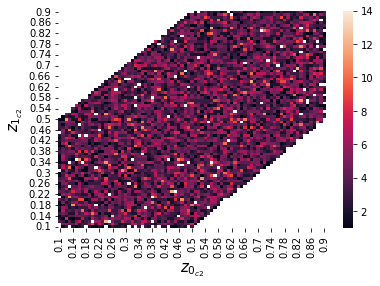

In [24]:
plot_slots_heatmap(diagonal_dataset_heatmap, n_slots)

In [34]:
delta = 0.5
data = []
for _ in range(10000):
    temp = []
    a = np.random.rand(1)
    while len(temp) < 2:
        b = a + (np.random.rand(1) * 2  - 1) * delta / 2

        if np.max(b) < 1 and np.min(b) > 0:
            temp.append(b)
        
    data.append(temp)

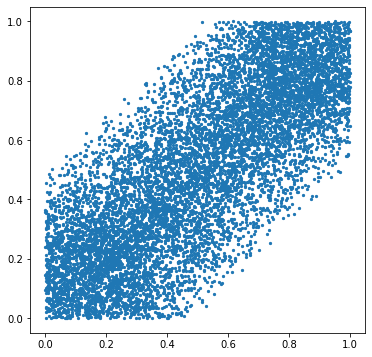

In [35]:
plt.figure(figsize=(6, 6))
plt.scatter(np.array(data)[:, 0, 0], np.array(data)[:, 1, 0], s=5)
# plt.xlim(0, 1)
# plt.ylim(0, 1)

In [155]:
eps

array([[ 0.02677535, -0.02677535,  0.02677535, -0.02677535],
       [-0.02677535,  0.02677535, -0.02677535, -0.02677535]])

In [168]:
import itertools
list(itertools.permutations([1, 1, -1]))


[(1, 1, -1), (1, -1, 1), (1, 1, -1), (1, -1, 1), (-1, 1, 1), (-1, 1, 1)]

In [171]:
start = [[1]]

In [ ]:
start.pop

In [199]:
def get_permutations(n_slots):
    start = [[]]
    while not all([len(i) == n_slots for i in start]):
        curr = start.pop(0)
        start.append(curr + [-1])
        start.append(curr + [1])

    return start


In [376]:
b

array([[0.26256588, 0.74311147],
       [0.26256588, 0.74311147],
       [0.26256588, 0.74311147],
       [0.26256588, 0.74311147],
       [0.26256588, 0.74311147]])

In [496]:
def gram_schmidt_util(a, b):
    return a * np.dot(a, b) / np.dot(a, a)

In [516]:
delta = .6
n_slots = 2
latents = 2
data = []
for _ in range(1000):
    a = np.random.rand(latents)
    eps = (np.random.rand()*2  - 1) * delta 
    temp = [a]
    while len(temp) < n_slots + 1:
        perpendicular = np.random.rand(latents)
        
        for vec in temp:
            perpendicular -= gram_schmidt_util(vec, perpendicular)
#         perpendicular /= np.linalg.norm(perpendicular)
    
        
        b = a + eps * perpendicular

#         if np.max(b) < 1 and np.min(b) > 0:
        temp.append(b)
    temp.pop(0)
    data.append(temp)

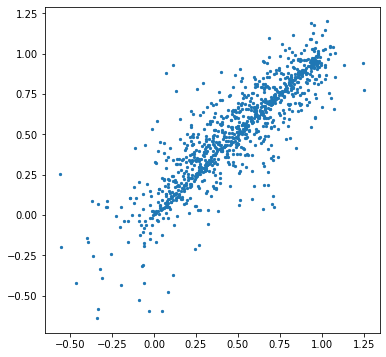

In [517]:
plt.figure(figsize=(6, 6))
plt.scatter(np.array(data)[:, 1, 0], np.array(data)[:, 0, 0], s=5)
# plt.xlim(0, 1)
# plt.ylim(0, 1)

In [369]:
delta = .2
n_slots = 5
latents = 2
data = []
for _ in range(10000):
    a = np.random.rand(latents)
    
    permutations = get_permutations(latents)
    inds = np.random.choice(range(len(permutations)), size=[n_slots], replace=True)
    perpendicular = np.array([permutations[ind] for ind in inds])
    
    
    eps = (np.random.rand() * 2  - 1) * delta * perpendicular
    b = np.array([a]*n_slots) + eps
    
    if np.max(b) < 1 and np.min(b) > 0:
        data.append(b)

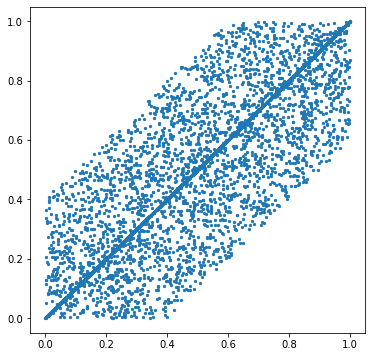

In [370]:
plt.figure(figsize=(6, 6))
plt.scatter(np.array(data)[:, 1, 0], np.array(data)[:, 0, 0], s=5)
# plt.xlim(0, 1)
# plt.ylim(0, 1)

In [252]:
delta = .5
n_slots = 2
data = []
for _ in range(10000):
    temp = []
    a = np.random.rand(3)
    temp.append(a)
    while len(temp) < n_slots:
        eps = (np.random.rand(3) * 2  - 1) * delta
        b = a + eps
        if np.max(b) < 1 and np.min(b) > 0:
            temp.append(b)
        
    data.append(temp)

(0.0, 1.0)

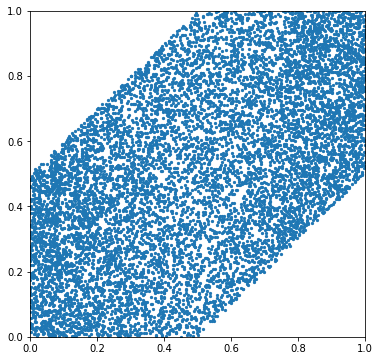

In [253]:
plt.figure(figsize=(6, 6))
plt.scatter(np.array(data)[:, 0, 0], np.array(data)[:, 1, 0], s=5)
plt.xlim(0, 1)
plt.ylim(0, 1)

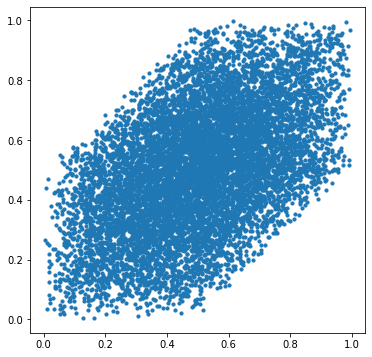

In [52]:
plt.figure(figsize=(6, 6))
plt.scatter(np.array(data)[:, 0, 0], np.array(data)[:, 1, 0], s=10)

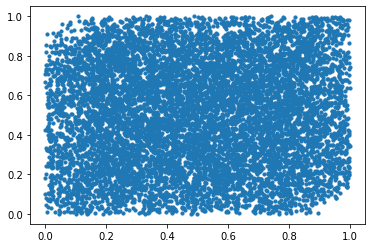

In [19]:
plt.scatter(np.array(data)[:, 0, 1], np.array(data)[:, 1, 1], s=10)


In [20]:
data

[[array([0.71854437, 0.62722137, 0.65771583]),
  array([0.2296028 , 0.373372  , 0.36098803])],
 [array([0.25476968, 0.1280705 , 0.37138547]),
  array([0.40039475, 0.0552629 , 0.68435206])],
 [array([0.68616403, 0.64503843, 0.65660513]),
  array([0.61506145, 0.43872152, 0.8102796 ])],
 [array([0.79742244, 0.82934425, 0.80061445]),
  array([0.90562123, 0.35461669, 0.01468099])],
 [array([0.20173018, 0.27776961, 0.14669091]),
  array([0.39631364, 0.08630942, 0.20285955])],
 [array([0.78173405, 0.30165859, 0.16890134]),
  array([0.62840641, 0.62429491, 0.4787747 ])],
 [array([0.89222755, 0.50836853, 0.34358043]),
  array([0.45834534, 0.09888717, 0.31412813])],
 [array([0.52957826, 0.3255234 , 0.40090372]),
  array([0.88601391, 0.49839463, 0.59862405])],
 [array([0.17416262, 0.2147777 , 0.38512268]),
  array([0.77535468, 0.82408741, 0.4688681 ])],
 [array([0.11695736, 0.3688008 , 0.89098861]),
  array([0.26405847, 0.47491644, 0.81282349])],
 [array([0.70716583, 0.06211177, 0.2444155 ]),
  a

In [21]:
np.array(data)[:, 1, 0]

array([0.2296028 , 0.40039475, 0.61506145, ..., 0.48895188, 0.39039532,
       0.29405183])

In [22]:
np.array(data)[:, 0, 0]

array([0.71854437, 0.25476968, 0.68616403, ..., 0.88014812, 0.84794953,
       0.70497691])

In [23]:
a + delta * (np.random.rand() - 0.5) * b

array([0.75869847, 1.02893712, 0.99333777])

In [521]:
import torch

In [522]:
n_slots = 3
latents = 4
n_samples = 1000

In [548]:
n = n_samples
k = n_slots
l = latents
_n = 10*n
z = torch.Tensor(0, k, l)
while z.shape[0] < n:
    # sample randomly on diagonal
    _z = torch.repeat_interleave(torch.rand(n, l), k, dim=0).reshape(n, k, l)
    
    # apply random offset
    eps = torch.rand(n, k, l) * 2 * delta - delta
    _z += eps
    _z[:, 0, :] -= eps[:, 0, :]
    
    # only keep samples inside [0, 1]^{k×l}
    mask = ((_z - 0.5).abs() <= 0.5).flatten(1).all(1)
    idx = mask.nonzero().squeeze(1)
    z = torch.cat([z, _z[idx]])
z = z[:n]